<a href="https://colab.research.google.com/github/JoshuaOmondi/Data-Projects/blob/master/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TWITTER SENTIMENT ANALYSIS**

Sentiment analysis is a branch of Supervised Machine Learning that involves text classification. A sentiment analysis model will analyze a given text and tell whether the underlying sentiment is positive, negative or neutral. 
In my country Kenya, Twitter is a place where useful public discourses take place. Kenyans On Twitter, popularly known as KOT is a robust community of Kenyans who are known to be no-nonsense and always make sure that their voice is heard by the powers that be.  Towards the end of 2021, the country witnessed a lot of school unrests. A section of Kenyans have attributed this to fatigue that high school students may be facing as a result of very little rest. It is for this reason that I set out to find out what KOT think about the school unrests. This project was inspired by a Medium Artcile and Tutorial done by Yalin Yener. 

**Data Collection**

To be able to have access to the tweets, one needs to have a Twitter Developer account. If you don't, one can apply for one. It doesn't take long for Twitter to approve a new account. Once your account has been approved, one can access the data through the Twitter API. 


In [5]:
#installing modules
!pip install textblob
!pip install pycountry
!pip install langdetect
!pip install twython

The pycountry package provides an ISO databases for standards. langdetect is a language detection package, twython module provides an easy way to access Twitter data and textblob is a python library for processing textual data.

In [4]:
#importing libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [10]:
#Authentication
consumerKey = "ppGXkNn883A77r18ah4GwEUo9"
consumerSecret = "QnnKBSKy9tCRjSZ2ZjByP6eBoqLcLwqqZoXuscfB8Qkqw7f6a9"
accessToken = "1159134405757194240-LaQwM23zdbWVR6xbAYWVwFKa2P5yI7"
accessTokenSecret = "vdtSy9nbLu2R97dceVwnrdXHaTlaocwh4dXSGd2pn6moa"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

These keys are only accessible after getting a Twitter developer account approved.

In [ ]:
#getting tweets

def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search, q=keyword).items(1000)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
     negative_list.append(tweet.text)
     negative += 1

 elif pos > neg:
    positive_list.append(tweet.text)
    positive += 1
 
 elif pos == neg:
     neutral_list.append(tweet.text)
     neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [8]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1
positive number:  0
negative number:  0
neutral number:  0


In [ ]:
tweet_list

,0
0,Kenya: Parents express concern over increased ...
1,Say tough disciplinary actions against student...
2,@Maryiana96 @ochegoken There's business going ...
3,RT @historykenya101: In the wake of schools fi...
4,RT @davidmakali1: I blame the spreading unrest...
...,...
995,RT @MuriukiEugene: Maybe the solution to the i...
996,KAKAMEGA HIGH SCHOOL ON FIRE\n\nPrestigious Ka...
997,RT @anyonaamsowel: Corporal punishment is not ...
998,RT @anyonaamsowel: Mitigating schools unrest:\...


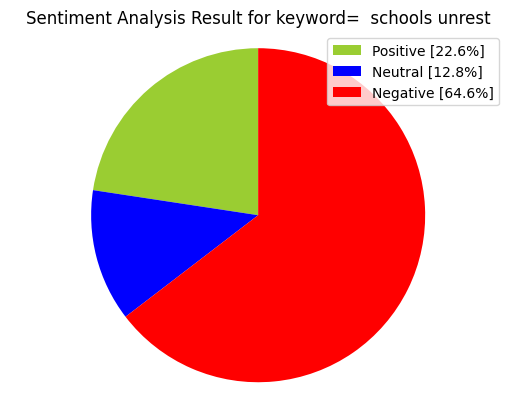

In [ ]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

From the pie chart, we can see that from the sample of 1,000 tweets that I analyzed, approximately 65% said something negative about the ongoing schools unrest. Roughly 23% had something positive to say while 13% of the tweets were neither positive nor negative.

In [ ]:
tweet_list.drop_duplicates(inplace = True) #dropping duplicated tweets

In [ ]:
#Extracting text values
text_all = tweet_list[0].values 
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [ ]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,Kenya: Parents express concern over increased ...,Kenya: Parents express concern over increased ...
1,Say tough disciplinary actions against student...,Say tough disciplinary actions against student...
2,@Maryiana96 @ochegoken There's business going ...,@Maryiana96 @ochegoken There's business going ...
3,RT @historykenya101: In the wake of schools fi...,RT @historykenya101: In the wake of schools fi...
4,RT @davidmakali1: I blame the spreading unrest...,RT @davidmakali1: I blame the spreading unrest...
...,...,...
992,RT @anyonaamsowel: Corporal punishment is not ...,RT @anyonaamsowel: Corporal punishment is not ...
994,"Following unrest in secondary schools, I sugge...","Following unrest in secondary schools, I sugge..."
995,RT @MuriukiEugene: Maybe the solution to the i...,RT @MuriukiEugene: Maybe the solution to the i...
996,KAKAMEGA HIGH SCHOOL ON FIRE\n\nPrestigious Ka...,KAKAMEGA HIGH SCHOOL ON FIRE\n\nPrestigious Ka...


In [ ]:
#Cleaning Text (Removing RTs, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Kenya: Parents express concern over increased ...,kenya parents express concern over increased ...
1,Say tough disciplinary actions against student...,say tough disciplinary actions against student...
2,@Maryiana96 @ochegoken There's business going ...,there s business going on behind the unres...
3,RT @historykenya101: In the wake of schools fi...,in the wake of schools fires amp students u...
4,RT @davidmakali1: I blame the spreading unrest...,i blame the spreading unrest in schools on 3 ...
5,@GodfreyMutwir14 @amerix I said most not all. ...,i said most not all and specifically in t...
6,Principals and deputies should be investigated...,principals and deputies should be investigated...
7,RT @brianmutinda_: What exactly is causing all...,what exactly is causing all this unrest in bo...
9,@OleItumbi All through politics!!!!!Comment ab...,all through politics comment about the c...
10,"""It looks mundane and juvenile to burn a build...",it looks mundane and juvenile to burn a build...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Kenya: Parents express concern over increased ...,kenya parents express concern over increased ...,0.000000,0.000000,positive,0.000,0.792,0.208,0.2732
1,Say tough disciplinary actions against student...,say tough disciplinary actions against student...,-0.388889,0.833333,negative,0.309,0.556,0.136,-0.4215
2,@Maryiana96 @ochegoken There's business going ...,there s business going on behind the unres...,-0.400000,0.700000,neutral,0.000,1.000,0.000,0.0000
3,RT @historykenya101: In the wake of schools fi...,in the wake of schools fires amp students u...,0.000000,0.000000,negative,0.144,0.856,0.000,-0.5719
4,RT @davidmakali1: I blame the spreading unrest...,i blame the spreading unrest in schools on 3 ...,0.300000,0.000000,positive,0.109,0.724,0.167,0.3182
5,@GodfreyMutwir14 @amerix I said most not all. ...,i said most not all and specifically in t...,0.500000,0.500000,neutral,0.000,1.000,0.000,0.0000
6,Principals and deputies should be investigated...,principals and deputies should be investigated...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,RT @brianmutinda_: What exactly is causing all...,what exactly is causing all this unrest in bo...,0.250000,0.250000,negative,0.136,0.758,0.106,-0.1531
9,@OleItumbi All through politics!!!!!Comment ab...,all through politics comment about the c...,0.000000,0.400000,neutral,0.000,1.000,0.000,0.0000
10,"""It looks mundane and juvenile to burn a build...",it looks mundane and juvenile to burn a build...,-0.405556,0.472222,negative,0.237,0.763,0.000,-0.6808


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
negative,111,41.57
positive,79,29.59
neutral,77,28.84


After cleaning the text and removing duplicates, we remain with a few number of unique tweets which we shall analyze the sentiments in them.

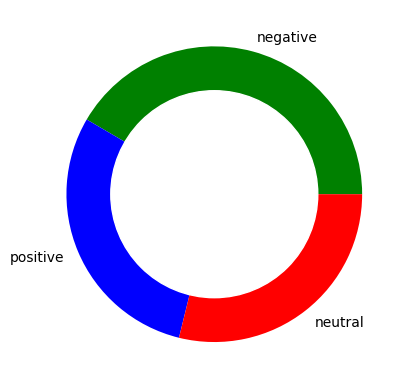

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


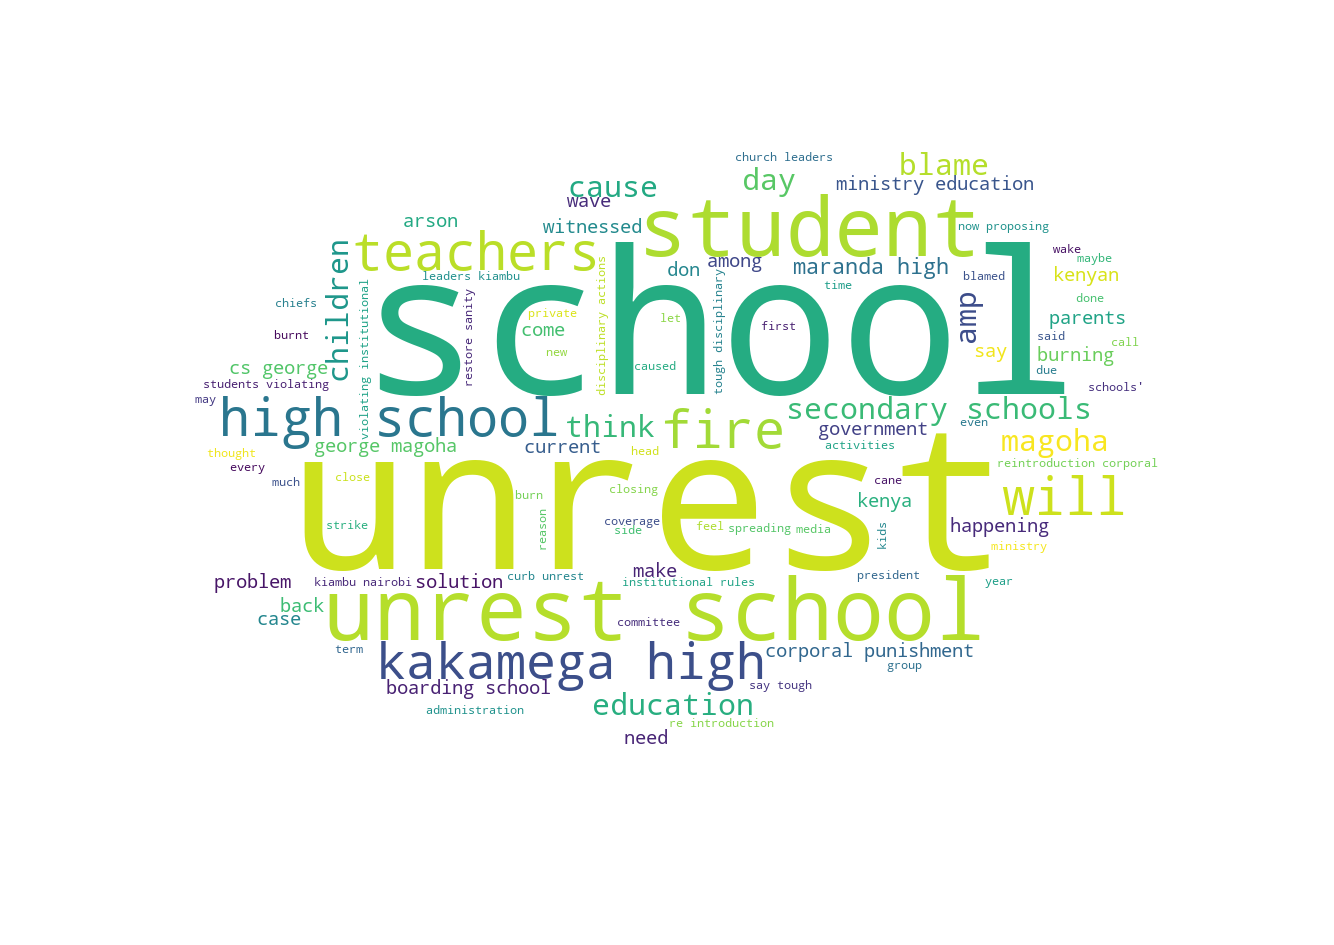

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

From the wordcloud, we can see that the words that are very dominant in the unique tweets are school, kakamega high, unrest, students, teachers among others.

Word Cloud Saved Successfully


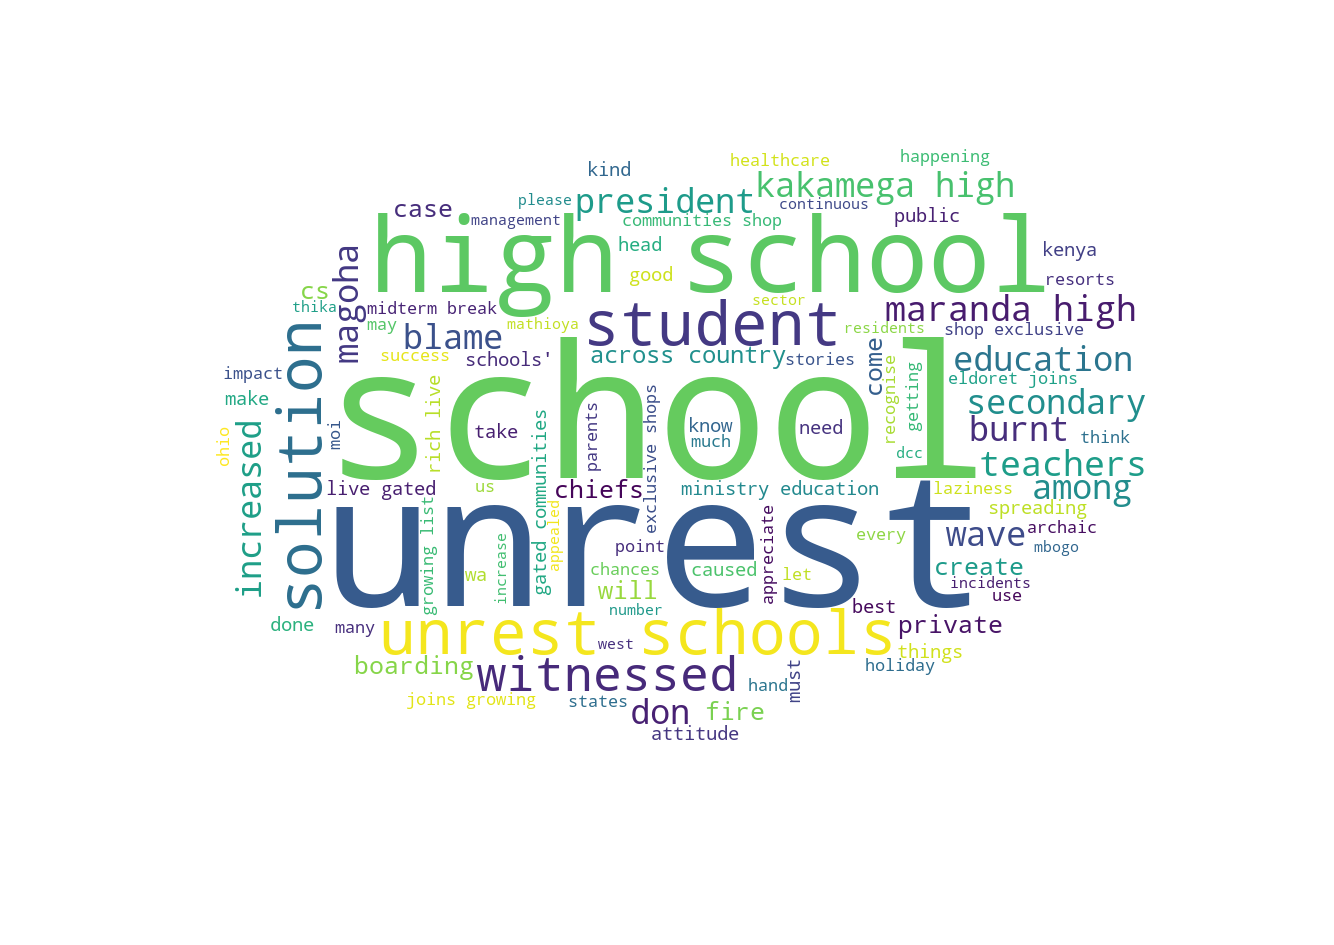

In [ ]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


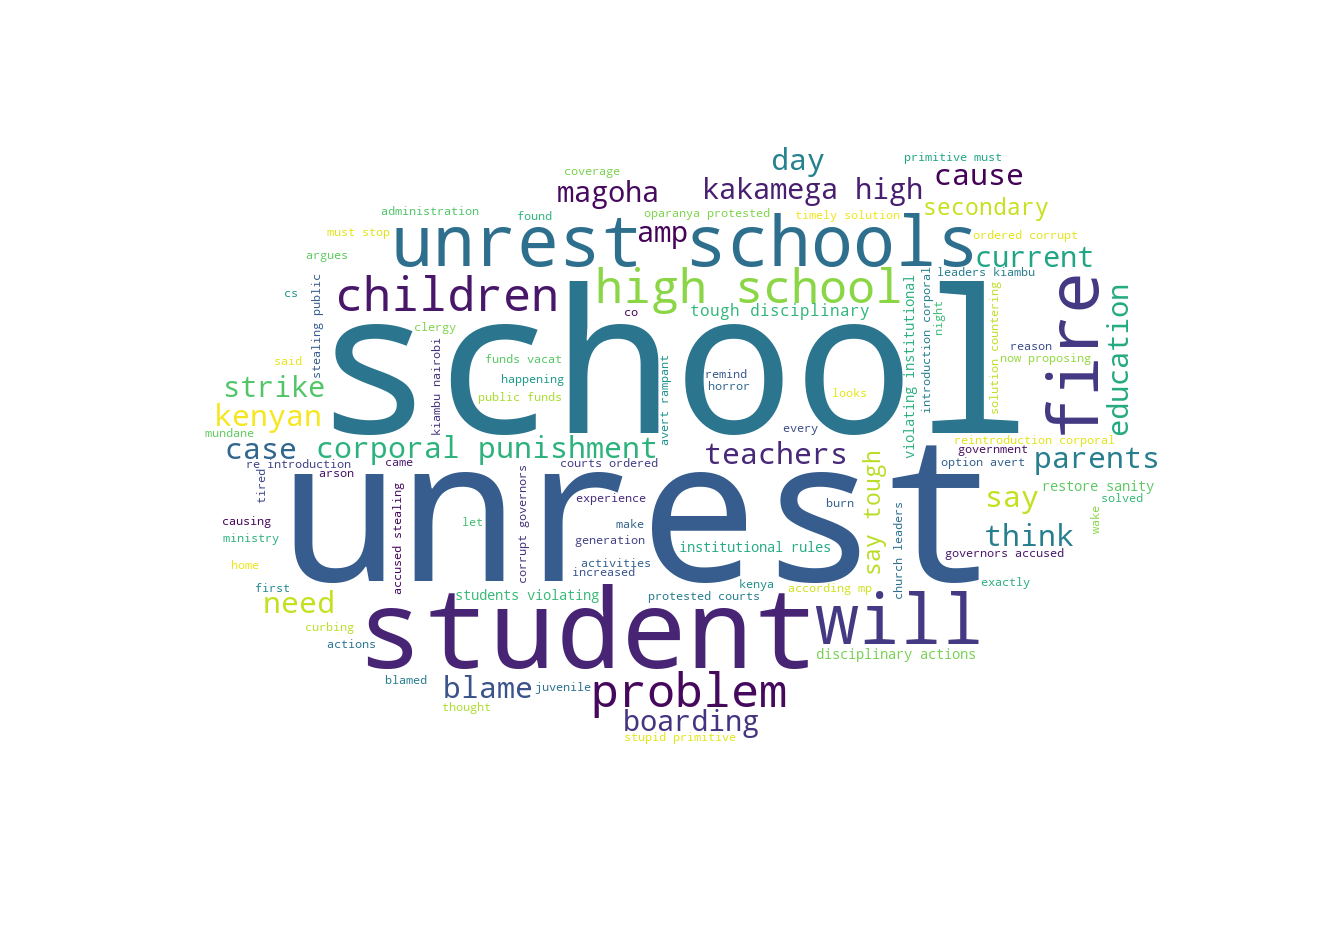

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


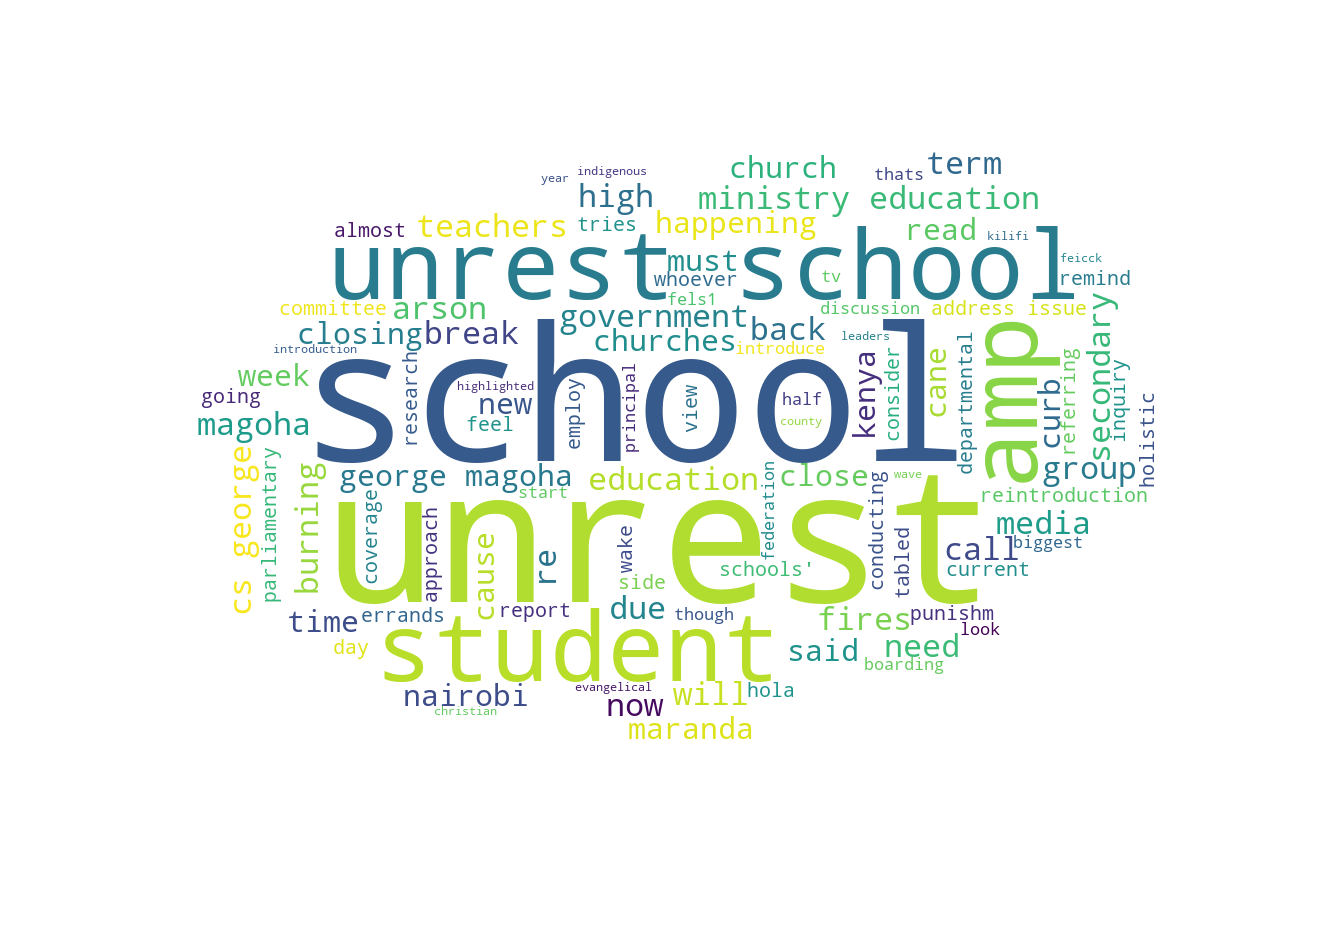

In [ ]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [ ]:
#Calculating tweet's length and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,113.50
neutral,98.99
positive,114.13


In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,19.11
neutral,16.42
positive,18.97


In [ ]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [ ]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [ ]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#The purpose of applying stemmer is to eliminate words that have the same root

In [ ]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [ ]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Kenya: Parents express concern over increased ...,kenya parents express concern over increased ...,0.000000,0.000000,positive,0.000,0.792,0.208,0.2732,95,9,kenya parents express concern over increased ...,"[kenya, parents, express, concern, over, incre...","[kenya, parents, express, concern, increased, ...","[kenya, parent, express, concern, increas, unr..."
1,Say tough disciplinary actions against student...,say tough disciplinary actions against student...,-0.388889,0.833333,negative,0.309,0.556,0.136,-0.4215,98,12,say tough disciplinary actions against student...,"[say, tough, disciplinary, actions, against, s...","[say, tough, disciplinary, actions, students, ...","[say, tough, disciplinari, action, student, vi..."
2,@Maryiana96 @ochegoken There's business going ...,there s business going on behind the unres...,-0.400000,0.700000,neutral,0.000,1.000,0.000,0.0000,58,10,there s business going on behind the unres...,"[, there, s, business, going, on, behind, the,...","[, business, going, behind, unrest, schools]","[, busi, go, behind, unrest, school]"
3,RT @historykenya101: In the wake of schools fi...,in the wake of schools fires amp students u...,0.000000,0.000000,negative,0.144,0.856,0.000,-0.5719,124,24,in the wake of schools fires amp students u...,"[, in, the, wake, of, schools, fires, amp, stu...","[, wake, schools, fires, amp, students, unrest...","[, wake, school, fire, amp, student, unrest, n..."
4,RT @davidmakali1: I blame the spreading unrest...,i blame the spreading unrest in schools on 3 ...,0.300000,0.000000,positive,0.109,0.724,0.167,0.3182,122,21,i blame the spreading unrest in schools on t...,"[, i, blame, the, spreading, unrest, in, schoo...","[, blame, spreading, unrest, schools, things, ...","[, blame, spread, unrest, school, thing, lazi,..."


In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

267 Number of reviews has 876 words


In [ ]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,ablaz,abolish,abolit,abruptli,abus,accord,account,accus,acknowledg,across,act,action,activ,actual,address,adequ,admin,administr,administrati,admiss,adult,advantag,affair,affect,agre,air,albert,alcohol,alert,allianc,allow,alma,almost,alon,alshabaab,also,alway,amic,amon,...,w,wa,wait,wakati,wake,walk,want,warn,watch,wave,way,wazazi,weather,week,welcom,welfar,west,whoever,whole,widespr,william,wilson,wish,wit,within,without,woke,wonder,work,worker,workload,world,worsen,would,wr,ya,year,yet,youth,zote
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
school,261
unrest,174
student,58
high,43
educ,24
fire,24
caus,21
magoha,20
teacher,19
blame,18


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('unrest schools', 68),
 ('high school', 29),
 ('schools unrest', 24),
 ('school unrest', 18),
 ('students unrest', 16),
 ('kakamega high', 15),
 ('secondary schools', 15),
 ('maranda high', 12),
 ('corporal punishment', 12),
 ('ministry education', 10),
 ('boarding schools', 9),
 ('cs george', 8),
 ('george magoha', 8),
 ('unrest secondary', 8),
 ('unrest need', 7),
 ('reintroduction corporal', 7),
 ('curb unrest', 6),
 ('student unrest', 6),
 ('cause unrest', 6),
 ('high schools', 6)]

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('kakamega high school', 14),
 ('maranda high school', 10),
 ('cs george magoha', 8),
 ('unrest secondary schools', 8),
 ('students unrest need', 6),
 ('say tough disciplinary', 5),
 ('tough disciplinary actions', 5),
 ('disciplinary actions students', 5),
 ('actions students violating', 5),
 ('students violating institutional', 5),
 ('violating institutional rules', 5),
 ('institutional rules restore', 5),
 ('rules restore sanity', 5),
 ('church leaders kiambu', 5),
 ('leaders kiambu nairobi', 5),
 ('reintroduction corporal punishment', 5),
 ('wake schools fires', 4),
 ('schools fires amp', 4),
 ('fires amp students', 4),
 ('amp students unrest', 4)]

Closing Remarks
1. Most used word was school.
2. School and unrest are the words that were most used together.